In [2]:
%matplotlib notebook
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math

In [3]:
def f(x):
    return math.sin(x/5)*math.exp(x/10)+5*math.exp(-x/2) 

In [4]:
def getWeights(points, function):
    maxPower = points.size - 1
    A = np.full((maxPower + 1, maxPower + 1), 0)
    for index, value in enumerate(points):
        A[index] = np.power(np.full(maxPower + 1, value), np.arange(0, maxPower + 1, 1))
    B = np.vectorize(function)(points)
    
    return linalg.solve(A, B)

In [5]:
def getMultiPowFunction(weights):
    size = weights.size
    function = lambda x: np.sum(weights * np.power(np.full(size, x), np.arange(0, size, 1)))
    return np.vectorize(function)

In [14]:
def approximate(points, function, xRange):
    approximatedFunction = getMultiPowFunction(getWeights(points, function))
    x = np.arange(xRange[0], xRange[1], 0.1)
    plt.plot(x, np.vectorize(function)(x))
    plt.plot(x, approximatedFunction(x))
    plt.show()

<IPython.core.display.Javascript object>


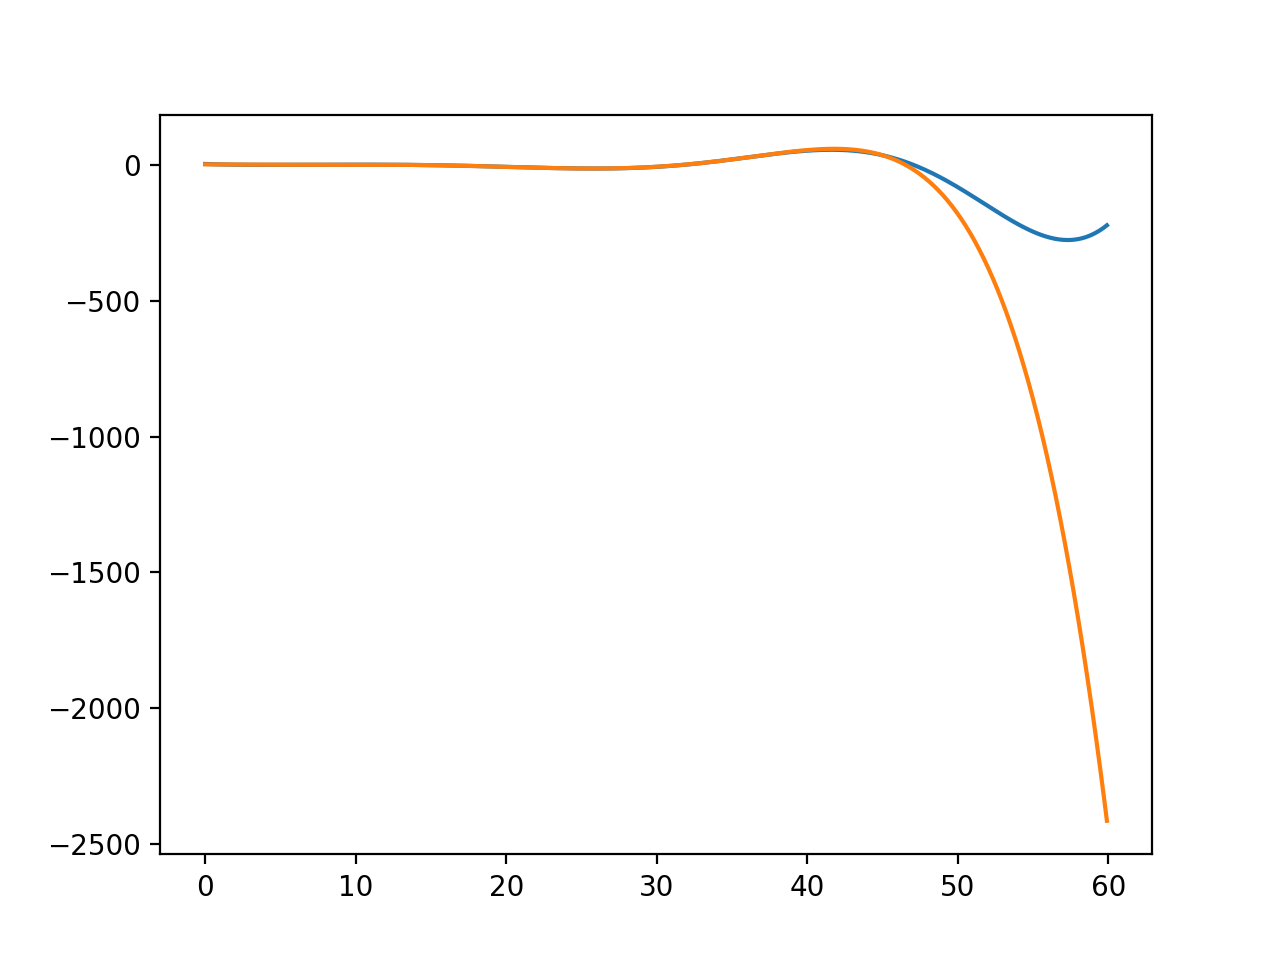

In [13]:
points = np.array([1., 8., 12., 15., 25., 35., 45.])
approximate(points, f, (0., 60.))